<a href="https://colab.research.google.com/github/Meghs1424/Poverty-Level-Prediction/blob/main/FDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
R.version.string

[1] "R version 4.1.1 (2021-08-10)"

In [2]:
# Library block
library(readr)
library(ggplot2)
library(tidyverse)
library(rpart)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
train = read.csv("train.csv")
dim(train)

[1] 9557  143

In [4]:
head(train)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,⋯,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,NA,0,⋯,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,⋯,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,NA,0,8,0,1,1,0,NA,0,⋯,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,⋯,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,⋯,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,⋯,121,1444,16,121,4,1.777778,1,121,1444,4


In [5]:
features = read_csv("codebook.csv")
features

Rows: 141 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Variable name, Variable description


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Variable name,Variable description
<chr>,<chr>
v2a1,Monthly rent payment
hacdor,=1 Overcrowding by bedrooms
rooms,number of all rooms in the house
hacapo,=1 Overcrowding by rooms
v14a,=1 has toilet in the household
refrig,=1 if the household has refrigerator
v18q,owns a tablet
v18q1,number of tablets household owns
r4h1,Males younger than 12 years of age


## **Checking NA values**

In [6]:
dim(train)

[1] 9557  143

In [7]:
sum(is.na(train))

[1] 22140

In [8]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

In [9]:
df <- data.frame(t(colSums(is.na(train))))
df %>% 
  select_if(~ sum(.) > 0)

v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6860,7342,7928,5,5


In [10]:
df

Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,6860,0,0,0,0,0,0,7342,0,0,0,0,0,0,0,0,0,0,0,0,7928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0


For 'rez_ecs' : Can drop column

For 'v2a1', 'v18q1', 'SQBmeaned', 'meaneduc' : Replace NA with median value

In [11]:
train <- subset(train, select = -c(rez_esc))
train$v2a1[is.na(train$v2a1)] <- median(train$v2a1, na.rm=TRUE)
train$v18q1[is.na(train$v18q1)] <- median(train$v18q1, na.rm=TRUE)
train$SQBmeaned[is.na(train$SQBmeaned)] <- median(train$SQBmeaned, na.rm=TRUE)
train$meaneduc[is.na(train$meaneduc)] <- median(train$meaneduc, na.rm=TRUE)

In [12]:
sum(is.na(train))

[1] 0

In [13]:
dim(train)

[1] 9557  142

In [14]:
head(train)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,130000,0,8,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,

## **Dealing with Categorical Data**

In [15]:
head(train, 10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,130000,0,8,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,

In [16]:
train %>%
  select_if(is.character) %>%
  head(10)

,Id,idhogar,dependency,edjefe,edjefa
,<chr>,<chr>,<chr>,<chr>,<chr>
1,ID_279628684,21eb7fcc1,no,10,no
2,ID_f29eb3ddd,0e5d7a658,8,12,no
3,ID_68de51c94,2c7317ea8,8,no,11
4,ID_d671db89c,2b58d945f,yes,11,no
5,ID_d56d6f5f5,2b58d945f,yes,11,no
6,ID_ec05b1a7b,2b58d945f,yes,11,no
7,ID_e9e0c1100,2b58d945f,yes,11,no
8,ID_3e04e571e,d6dae86b7,yes,9,no
9,ID_1284f8aad,d6dae86b7,yes,9,no


Id column not needed for classification, though keep for right now 

'idhogar' column : Household level identifier (find number of unique values and figure out)

'dependency' : Dependency rate

'edjefe' : Years of education for male head of family (replace 'no' with zero)

'edjefa' : Years of education for female head of family (replace 'no' with zero)


In [17]:
count(unique(train[c('idhogar')]))

n
<int>
2988


In [18]:
as.data.frame(table(train$idhogar))

Var1,Freq
<fct>,<int>
001ff74ca,2
003123ec2,4
004616164,2
004983866,2
005905417,3
006031de3,4
006555fe2,5
00693f597,4
006b64543,2


Too many unique values with small frequencies 

Implementing label encoding

In [19]:
install.packages('superml')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(superml)
label <- LabelEncoder$new()
#print(label$fit(train$idhogar))
train$idhogar <- label$fit_transform(train$idhogar)

Loading required package: R6



In [21]:
as.data.frame(table(train$idhogar))

Var1,Freq
<fct>,<int>
0,1
1,1
2,1
3,4
4,4
5,2
6,2
7,4
8,2


In [22]:
as.data.frame(table(train$dependency))

Var1,Freq
<fct>,<int>
.16666667,7
.2,90
.22222222,11
.25,260
.2857143,9
.33333334,598
.40000001,84
.5,1497
.60000002,8


In [23]:
as.data.frame(table(train$edjefe))

Var1,Freq
<fct>,<int>
10,111
11,751
12,113
13,103
14,208
15,285
16,134
17,202
18,19


In [24]:
as.data.frame(table(train$edjefa))

Var1,Freq
<fct>,<int>
10,96
11,399
12,72
13,52
14,120
15,188
16,113
17,76
18,3


For 'dependency', 'edjefe', 'edjefa' : replace 'no' with zero and 'yes' with median value

In [25]:
train$dependency[train$dependency == 'no'] = 0
train$dependency[train$dependency == 'yes'] = median(train$dependency)
as.data.frame(table(train$dependency))

Var1,Freq
<fct>,<int>
.16666667,7
.2,90
.22222222,11
.25,260
.2857143,9
.33333334,598
.40000001,84
.5,1497
.60000002,8


In [26]:
train$edjefa[train$edjefa == 'no'] = 0
train$edjefa[train$edjefa == 'yes'] = median(train$edjefa)
as.data.frame(table(train$edjefa))

Var1,Freq
<fct>,<int>
0,6299
10,96
11,399
12,72
13,52
14,120
15,188
16,113
17,76


In [27]:
train$edjefe[train$edjefe == 'no'] = 0
train$edjefe[train$edjefe == 'yes'] = median(train$edjefe)
as.data.frame(table(train$edjefe))

Var1,Freq
<fct>,<int>
0,3762
10,111
11,751
12,113
13,226
14,208
15,285
16,134
17,202


## **Dealing with Class Imbalance (SMOTE)**

In [28]:
head(train)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,ID_279628684,190000,0,3,0,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,10,0,10,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0,100,1849,4
2,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,8,12,0,12,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64,144,4489,4
3,ID_68de51c94,130000,0,8,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,1,8,0,11,11,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64,121,8464,4
4,ID_d671db89c,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3,2,2,0,4,0,11,0,11,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1,121,289,4
5,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,2,2,0,4,0,11,0,11,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1,121,1369,4
6,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,

In [29]:
train1 <- train
train1$Target[train1$Target == 1] = 'Extreme Poverty'
train1$Target[train1$Target == 2] = 'Moderate Poverty'
train1$Target[train1$Target == 3] = 'Vulnerable Household'
train1$Target[train1$Target == 4] = 'Non-Vulnerable Household'

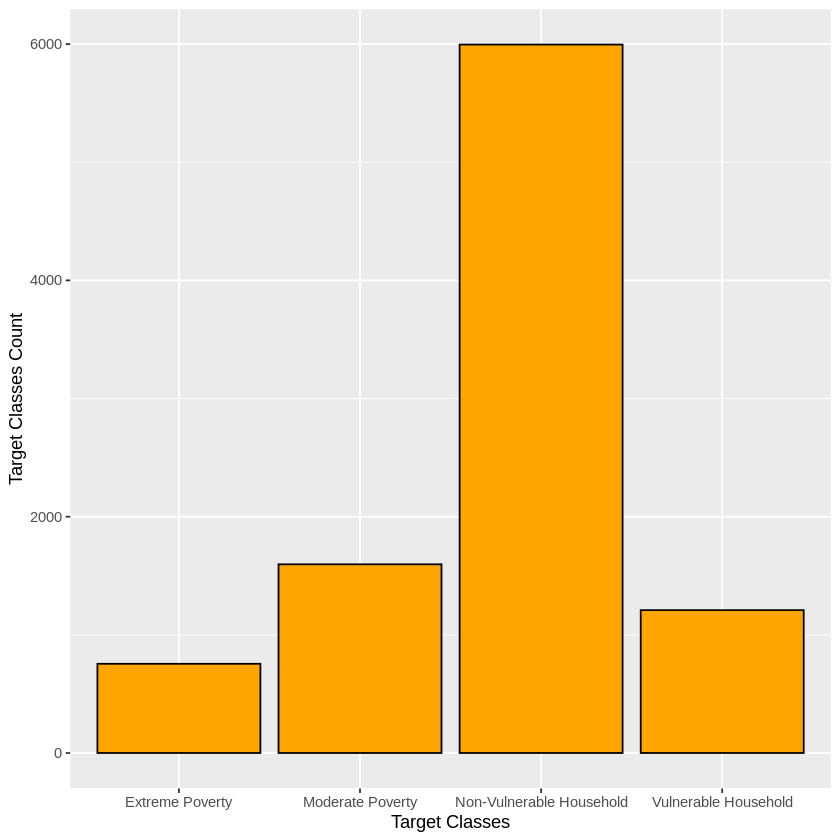

In [30]:
train1 %>%
ggplot(aes(Target))+
geom_bar(color = 'black', fill = 'orange')+
xlab("Target Classes")+
ylab("Target Classes Count")

In [31]:
library(devtools)
remotes::install_github("cran/DMwR")

Loading required package: usethis

Skipping install of 'DMwR' from a github remote, the SHA1 (6fd4f0cd) has not changed since last install.
  Use `force = TRUE` to force installation



In [32]:
library(DMwR)

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [33]:
typeof(train$Target)

[1] "integer"

In [34]:
train1 <- train
train1 <- subset(train1, select = c(-Id))
str(train1)

'data.frame':	9557 obs. of  141 variables:
 $ v2a1           : num  190000 135000 130000 180000 180000 180000 180000 130000 130000 130000 ...
 $ hacdor         : int  0 0 0 0 0 0 0 1 1 1 ...
 $ rooms          : int  3 4 8 5 5 5 5 2 2 2 ...
 $ hacapo         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ v14a           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ refrig         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ v18q           : int  0 1 0 1 1 1 1 0 0 0 ...
 $ v18q1          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ r4h1           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ r4h2           : int  1 1 0 2 2 2 2 1 1 1 ...
 $ r4h3           : int  1 1 0 2 2 2 2 1 1 1 ...
 $ r4m1           : int  0 0 0 1 1 1 1 2 2 2 ...
 $ r4m2           : int  0 0 1 1 1 1 1 1 1 1 ...
 $ r4m3           : int  0 0 1 2 2 2 2 3 3 3 ...
 $ r4t1           : int  0 0 0 1 1 1 1 2 2 2 ...
 $ r4t2           : int  1 1 1 3 3 3 3 2 2 2 ...
 $ r4t3           : int  1 1 1 4 4 4 4 4 4 4 ...
 $ tamhog         : int  1 1 1 4 4 4 4 4 4 4 ...
 $ tamviv         : int  

In [35]:
train1 %>%
  select_if(is.character) %>%
  head(2)

,dependency,edjefe,edjefa
,<chr>,<chr>,<chr>
1,0,10,0
2,8,12,0


In [36]:
train1$dependency <- as.integer(train1$dependency)
train1$edjefa <- as.integer(train1$edjefa)
train1$edjefe <- as.integer(train1$edjefe)

In [37]:
train1$Target <- as.factor(train1$Target)

In [38]:
as.data.frame(table(train$Target))

Var1,Freq
<fct>,<int>
1,755
2,1597
3,1209
4,5996


Undersampling would decrease the proportion of your majority class until the number is similar to the minority class. 

At the same time, Oversampling would resample the minority class proportion following the majority class proportion.


In [39]:
balanced_train <- SMOTE(Target ~ ., train1, perc.over = 2000, perc.under=140)

In [40]:
as.data.frame(table(balanced_train$Target))

Var1,Freq
<fct>,<int>
1,15855
2,3831
3,2977
4,14332


In [41]:
balanced_train1 <- SMOTE(Target ~., balanced_train, perc.over = 1000, perc.under = 200)

In [42]:
as.data.frame(table(balanced_train1$Target))

Var1,Freq
<fct>,<int>
1,27670
2,6733
3,32747
4,25137


In [43]:
balanced_train2 <- SMOTE(Target ~., balanced_train1, perc.over = 400, perc.under = 350)

In [44]:
as.data.frame(table(balanced_train2$Target))

Var1,Freq
<fct>,<int>
1,30508
2,33665
3,35930
4,27824


## **Feature Importance (Permutation Based Variable Importance)**

In [45]:
install.packages('DALEX')
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
library('DALEX')
library('randomForest')

Welcome to DALEX (version: 2.3.0).
Find examples and detailed introduction at: http://ema.drwhy.ai/
Additional features will be available after installation of: ggpubr.
Use 'install_dependencies()' to get all suggested dependencies


Attaching package: ‘DALEX’


The following object is masked from ‘package:dplyr’:

    explain


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [47]:
dim(balanced_train2)

[1] 127927    141

In [48]:
library('caTools')

In [49]:
balanced_train2$Target <- as.numeric(balanced_train2$Target)

In [50]:
sample <- sample.split(balanced_train2$Target, SplitRatio = .1)
sample <- subset(balanced_train2, sample==TRUE)


In [51]:
dim(sample)

[1] 12792   141

In [52]:
sample1 <- sample.split(sample$Target, SplitRatio = .75)
train_data <- subset(sample, sample1==TRUE)
test_data <- subset(sample, sample1==FALSE)

In [53]:
dim(train_data)

[1] 9593  141

In [54]:
dim(test_data)

[1] 3199  141

In [55]:
my_rf <- randomForest(Target ~., data = train_data)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


In [56]:
explain_rf <- DALEX::explain(model = my_rf, 
                               data = test_data[,0:140], 
                               y = test_data$Target, 
                               label = "Random Forest")

Preparation of a new explainer is initiated
  -> model label       :  Random Forest 
  -> data              :  3199  rows  140  cols 
  -> target variable   :  3199  values 
  -> predict function  :  yhat.randomForest  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package randomForest , ver. 4.6.14 , task regression (  default  ) 
  -> predicted values  :  numerical, min =  1 , mean =  2.475316 , max =  4  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -2.975533 , mean =  0.002020475 , max =  1.585667  
  A new explainer has been created!  


In [57]:
loss_root_mean_square(observed = test_data$Target, predicted = predict(my_rf, test_data))

[1] 0.3075083

In [58]:
set.seed(123)
(vip.50 <- model_parts(explainer = explain_rf, 
                      loss_function = loss_root_mean_square,
                      B = 50,
                      type = "difference"))

variable,permutation,dropout_loss,label
<chr>,<dbl>,<dbl>,<chr>
_full_model_,0,0.000000e+00,Random Forest
parentesco7,0,-5.890576e-05,Random Forest
techocane,0,-6.553916e-06,Random Forest
instlevel9,0,-4.877551e-06,Random Forest
parentesco10,0,-3.824895e-07,Random Forest
elimbasu4,0,-2.380784e-07,Random Forest
techootro,0,-3.984498e-08,Random Forest
pisoother,0,0.000000e+00,Random Forest
planpri,0,0.000000e+00,Random Forest


In [59]:
library('ggplot2')

In [60]:
tail(vip.50,20)

,variable,permutation,dropout_loss,label
,<chr>,<dbl>,<dbl>,<chr>
7223,qmobilephone,50,-0.0148187424,Random Forest
7224,lugar1,50,0.0115582546,Random Forest
7225,lugar2,50,-0.0199672482,Random Forest
7226,lugar3,50,-0.0203078044,Random Forest
7227,lugar4,50,-0.0192628068,Random Forest
7228,lugar5,50,-0.0163546169,Random Forest
7229,lugar6,50,-0.0187044693,Random Forest
7230,area1,50,-0.0093914016,Random Forest
7231,area2,50,-0.0106037153,Random Forest


In [61]:
options(repr.plot.width = 10, repr.plot.height = 50)

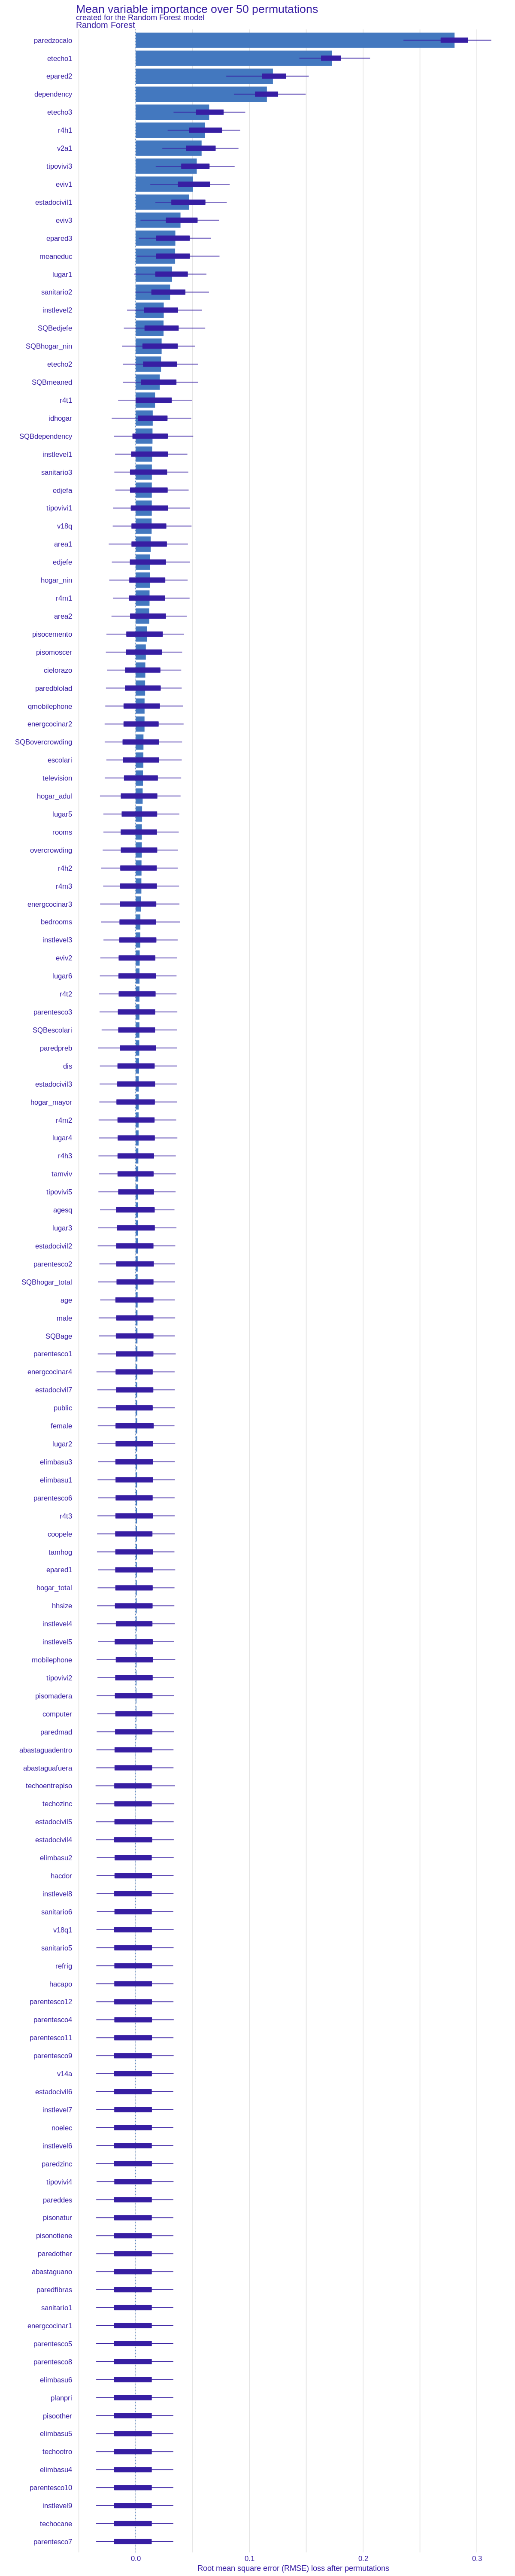

In [62]:
plot(vip.50) + 
  ggtitle("Mean variable importance over 50 permutations")

# **Analyse Correlation**

In [63]:
install.packages('Hmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
library('Hmisc')

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [65]:
data.rcorr = rcorr(as.matrix(balanced_train2))

In [66]:
data.coeff <- data.rcorr$r
data.p <- data.rcorr$p

In [67]:
dim(data.coeff)

[1] 141 141

In [68]:
head(data.coeff,2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v2a1,1.00000000,-0.02746546,0.1580617,-0.03443392,0.01652267,0.02970624,0.12022646,0.18237482,-0.01172914,-0.03107834,-0.03625672,0.03596503,0.001532236,0.02440949,0.01658818,-0.02191409,-0.009201852,-0.01290746,-0.01679364,0.11523319,-0.01290746,0.1024670,0.08682829,-0.17712469,-0.008569967,-0.05640248,-0.01770211,-0.012771661,-0.006184024,0.2076635,-0.20029245,-0.0008709208,-0.000796702,-0.002842477,-0.03749251,-0.009691085,0.02605790,-0.01898655,-0.001477065,0.1392595,0.01738922,-0.01704227,-0.004026707,0.05305386,-0.000637842,0.0007345548,-0.05401024,-0.007665412,0.085747606,-0.077989381,-0.005075625,-0.01399989,-0.003146334,0.10169084,-0.09749299,-0.005953537,0.05068791,-0.013512808,-0.04577086,-0.02325353,NaN,-0.001306585,-0.04222938,-0.002141653,0.02800711,0.09110019,-0.09011968,0.01122016,-0.05216395,-0.085656104,0.1130548,-0.08468670,0.020255037,-0.020255037,0.04302476,-0.140891140,0.08878766,0.02380116,-0.01389120,-0.01281934,-0.008647507,0.02962357,-0.06407558,0.03775268,-0.03486254,-0.009270185,-0.02512707,0.0084240238,-0.01332209,0.003707487,0.024585925,0.00881971,0.01882522,-0.24349935,-0.008224692,-0.01136508,-0.02130593,-0.01290746,0.005274963,0.1003841,0.051380175,0.21337963,0.03720743,-0.05344076,-0.05983550,-0.08744731,0.02884998,0.00451763,0.007323397,0.16291769,0.1552412,0.1128744,-0.1025841,-0.08965315,0.1958638,-0.001719861,-0.0007800773,-0.005620316,0.12376746,-0.06676015,0.02102318,0.033307527,0.18872795,-0.01609288,-0.01560824,-0.05716794,-0.157303753,-0.056530237,0.14882629,-0.14882629,-0.01096665,0.18575624,-0.007970706,-0.01866654,0.16187220,-0.003697212,-0.08574359,-0.00953574,0.22813647,-0.007970706,0.01515458
hacdor,-0.02746546,1.00000000,-0.2207135,0.64556333,-0.15319426,-0.09944992,-0.09420136,-0.03856871,0.23543907,0.01086600,0.14105685,0.24052790,0.132713844,0.25802675,0.30360894,0.08070854,0.256118386,0.25639504,0.31757945,-0.09245724,0.25639504,-0.1364228,0.07265146,-0.03588847,0.107479353,0.09576634,0.17093920,-0.009577737,-0.007215399,-0.1353449,0.03793789,-0.0037865667,0.047962502,0.219008233,0.07929895,-0.034410173,-0.02497296,-0.01584641,-0.006421943,-0.1603224,-0.04210060,0.05239601,-0.017743075,0.01979879,-0.002773193,-0.0123154229,-0.01687397,0.094233792,0.001948534,-0.004665741,-0.034067404,-0.01081925,-0.012775477,-0.05169517,0.04601831,0.014375530,-0.01364243,0.001286154,0.01583609,-0.01080203,NaN,-0.005680739,0.14734582,0.053275909,-0.14248558,0.12013464,0.01237628,-0.11103579,0.23274206,0.001681247,-0.1638803,-0.03805774,-0.003524923,0.003524923,0.09765555,0.009745041,-0.07586832,-0.03299989,0.01053011,-0.02973368,-0.004147346,-0.05573927

In [69]:
data.coeff1 <- as.data.frame(data.coeff[, 141])
head(data.coeff1, 2)

,"data.coeff[, 141]"
,<dbl>
v2a1,0.01515458
hacdor,-0.12613642


In [70]:
data.coeff <- as.data.frame(data.coeff)

In [71]:
data.coeff %>%
  select(Target) %>%
  arrange(desc(Target)) %>%
  filter(Target > 0.3)

,Target
,<dbl>
Target,1.0000000
epared3,0.4750542
etecho3,0.4558925
escolari,0.3595028
v18q,0.3562209
paredblolad,0.3441004
SQBescolari,0.3404588
television,0.3078663


In [72]:
data.coeff %>%
  select(Target) %>%
  arrange(Target) %>%
  filter(Target < -0.3)

,Target
,<dbl>
r4t1,-0.5082399
etecho1,-0.4441216
paredzocalo,-0.4425884
r4m1,-0.4179358
epared2,-0.4012238
r4h1,-0.3776451
hogar_nin,-0.3596533
estadocivil1,-0.3217847
